In [1]:
from google.colab import files
files.upload()

Saving Apple.csv to Apple.csv


{'Apple.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\r\n12/12/1980,0.513393,0.515625,0.513393,0.513393,0.407747,117258400\r\n12/15/1980,0.488839,0.488839,0.486607,0.486607,0.386473,43971200\r\n12/16/1980,0.453125,0.453125,0.450893,0.450893,0.358108,26432000\r\n12/17/1980,0.462054,0.464286,0.462054,0.462054,0.366972,21610400\r\n12/18/1980,0.475446,0.477679,0.475446,0.475446,0.377609,18362400\r\n12/19/1980,0.504464,0.506696,0.504464,0.504464,0.400656,12157600\r\n12/22/1980,0.529018,0.53125,0.529018,0.529018,0.420157,9340800\r\n12/23/1980,0.551339,0.553571,0.551339,0.551339,0.437885,11737600\r\n12/24/1980,0.580357,0.582589,0.580357,0.580357,0.460931,12000800\r\n12/26/1980,0.633929,0.636161,0.633929,0.633929,0.503479,13893600\r\n12/29/1980,0.642857,0.645089,0.642857,0.642857,0.51057,23290400\r\n12/30/1980,0.629464,0.629464,0.627232,0.627232,0.49816,17220000\r\n12/31/1980,0.611607,0.611607,0.609375,0.609375,0.483978,8937600\r\n1/2/1981,0.616071,0.620536,0.616071,0.616071,0.489296,54152

In [2]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import SGD

Using TensorFlow backend.


In [3]:
# DATA PREPROCESSING AND CLEANING 
training_set = pd.read_csv('Apple.csv')
training_set = training_set.iloc[:,1:2].values      #open prices
len(training_set)       #2D array 
training_set = training_set[~np.isnan(training_set)]
len(training_set)       #1D array
new_training_set = [[i] for i in training_set]      #converting back to 2D array
new_training_set = np.array(new_training_set) 
len(new_training_set)
new_training_set = new_training_set[5000:]
len(new_training_set)
# new_training_set

4822

[]

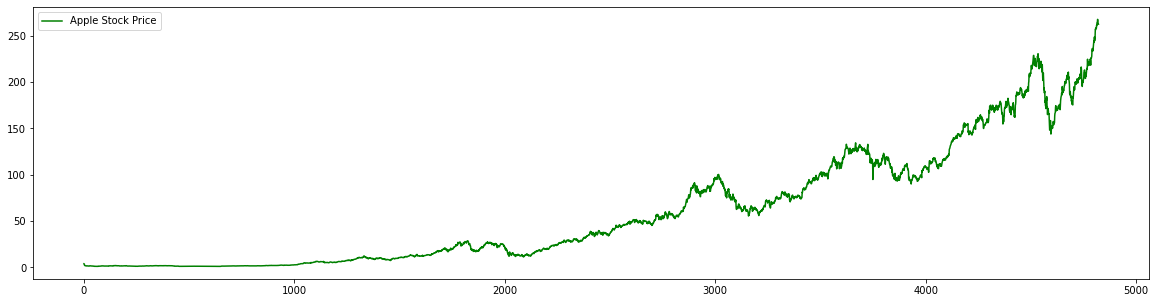

In [4]:
plt.figure(figsize=(20,5))
plt.plot(new_training_set,color="green",label="Apple Stock Price")
plt.legend()
plt.plot()

In [0]:
# FEATURE SCALING 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_training_set = sc.fit_transform(new_training_set)

In [0]:
# CREATING INPUT DATA STREAM
x_train = new_training_set[:]
x_new_train=[]
y_train=[]
for i in range(0,3000):
    x_new_train.append([x_train[i:i+50]])
    y_train.append(x_train[i+50])


x_train = np.reshape(x_new_train,(3000,50,1))
y_train = np.array(y_train)

In [0]:
# BUILDING THE MODEL
model = Sequential()

model.add(LSTM(500,input_shape=(50,1),return_sequences=True))
model.add(LSTM(500))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Dense(1))

In [0]:
# COMPILING MODEL 
model.compile(optimizer="adam",loss="mean_squared_error")

In [9]:
# STRUCTURE OF THE MODEL
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 500)           1004000   
_________________________________________________________________
lstm_2 (LSTM)                (None, 500)               2002000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               64128     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 3,070,257
Trainable params: 3,070,257
Non-trainable params: 0
_________________________________________________________________


In [10]:
# TRAINING THE MODEL ON THE TRAINING SET
model.fit(x_train,y_train,batch_size=64,epochs=100)

Epoch 1/100
3000/3000 [==============================] - 10s 3ms/step - loss: 9.0469e-04
Epoch 2/100
3000/3000 [==============================] - 8s 3ms/step - loss: 3.8143e-05
Epoch 3/100
3000/3000 [==============================] - 8s 3ms/step - loss: 3.7565e-05
Epoch 4/100
3000/3000 [==============================] - 8s 3ms/step - loss: 3.8891e-05
Epoch 5/100
3000/3000 [==============================] - 7s 2ms/step - loss: 3.5784e-05
Epoch 6/100
3000/3000 [==============================] - 8s 3ms/step - loss: 2.6187e-05
Epoch 7/100
3000/3000 [==============================] - 8s 3ms/step - loss: 2.9484e-05
Epoch 8/100
3000/3000 [==============================] - 7s 2ms/step - loss: 2.7255e-05
Epoch 9/100
3000/3000 [==============================] - 7s 2ms/step - loss: 2.1725e-05
Epoch 10/100
3000/3000 [==============================] - 8s 3ms/step - loss: 2.3201e-05
Epoch 11/100
3000/3000 [==============================] - 8s 3ms/step - loss: 2.4889e-05
Epoch 12/100
3000/3000 [=====

In [0]:
# SAVING THE MODEL
model.save("model.h5")

# ***PREDICTION***

In [0]:
# IMPORTING LIBRARIES
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
# LOADING SAVED MODEL
model = load_model("model.h5")

In [0]:
# DATA PREPROCESSING AND CLEANING
test_set = pd.read_csv('Apple.csv')
dates = test_set.iloc[:,0:1].values
test_set = test_set.iloc[:,1:2].values #open prices
len(test_set)
test_set #2D array 
test_set = test_set[~np.isnan(test_set)]
test_set #1D array
len(test_set)
new_test_set = [[i] for i in test_set] #converting back to 2D array
new_test_set = np.array(new_test_set) 
len(new_test_set)
new_test_set = new_test_set[5000:]
# new_test_set[4700]

In [0]:
# NORMALIZATION
sc = MinMaxScaler()
new_test_set = sc.fit_transform(new_test_set)

In [0]:
# CREATING INPUT STREAM OF DATA 
x_train = new_test_set[:]
x_test=[]
y_test=[]
for i in range(3000,4700):
    x_test.append([x_train[i:i+50]])
    y_test.append(x_train[i+50])

x_test=np.reshape(x_test,(1700,50,1))
y_test=np.array(y_test)
dates = dates[3050:4750]

In [0]:
# PREDICTION 
pred = model.predict(x_test)

In [0]:
# GETTING INVERSE TRANSFORMED VALUES OF PREDICTIONS 
pred = sc.inverse_transform(pred)
y_test = sc.inverse_transform(y_test)

In [19]:
y_test

array([[ 79.164284],
       [ 76.987144],
       [ 77.928574],
       ...,
       [199.619995],
       [201.020004],
       [203.160004]])

In [20]:
pred

array([[ 75.57312 ],
       [ 77.19142 ],
       [ 75.492355],
       ...,
       [195.04907 ],
       [193.60587 ],
       [194.66289 ]], dtype=float32)

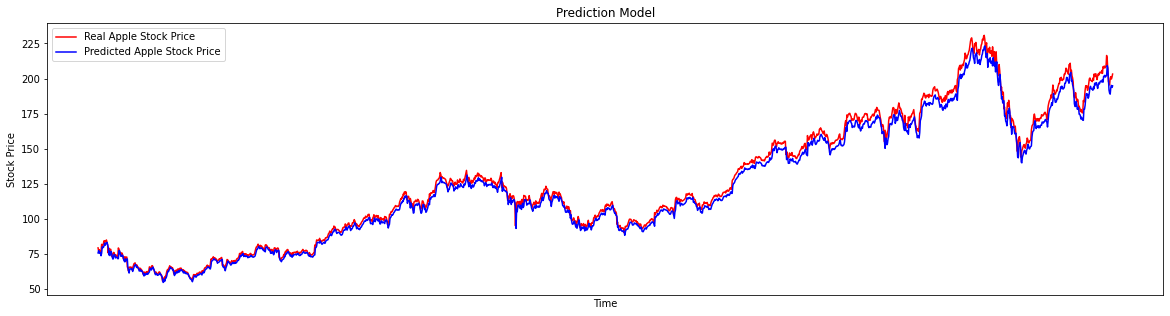

In [22]:
# VISUALIZATION OF PREDICTIONS VS REAL DATA
plt.figure(figsize=(20,5))
plt.plot(y_test,color="red",label="Real Apple Stock Price")
plt.plot(pred,color="blue",label="Predicted Apple Stock Price")
plt.title("Prediction Model")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.xticks([])
plt.legend()    
plt.show()

In [23]:
# CALCULATION OF RMSE VALUE
rmse = math.sqrt(mean_squared_error(y_test,pred))
print("rmse is:", '{0:.2f}'.format((rmse/1700)*100),"%")

rmse is: 0.26 %


# UNSUPERVISED LEARNING: *Prediction of Far Future*

In [0]:
# DATA PREPROCESSING AND CLEANING
test_set = pd.read_csv('Apple.csv')
test_open = test_set.iloc[:,1:2].values #open prices
test_dates = test_set.iloc[:,0:1].values #dates

In [0]:
# PREDICTING STOCKS FROM start TO end INDICES in batches of 50 and considering previous 10 samples 
def new_predicting(test_open,start,end):
    for i in range(start,end):
        x_test = []
        # NORMALIZATION
        sc = MinMaxScaler()
        new_test_open = sc.fit_transform(test_open)
        # CREATING INPUT STREAM OF DATA
        for j in range(i,i+10):
            x_test.append([new_test_open[i:i+50]])
        x_test = np.reshape(x_test,(10,50,1))
        # PREDICTION
        pred = model.predict(x_test)
        pred = sc.inverse_transform(pred)
        # UPDATING TESTSET WITH THE PREDICTED VALUE 
        im_test_open = [i[0] for i in test_open]
        im_test_open.append(pred[0][0])
        test_open = []
        test_open = [[i] for i in im_test_open]
    return test_open   

start = 3000
end = 6000
new = new_predicting(test_open,start,end)


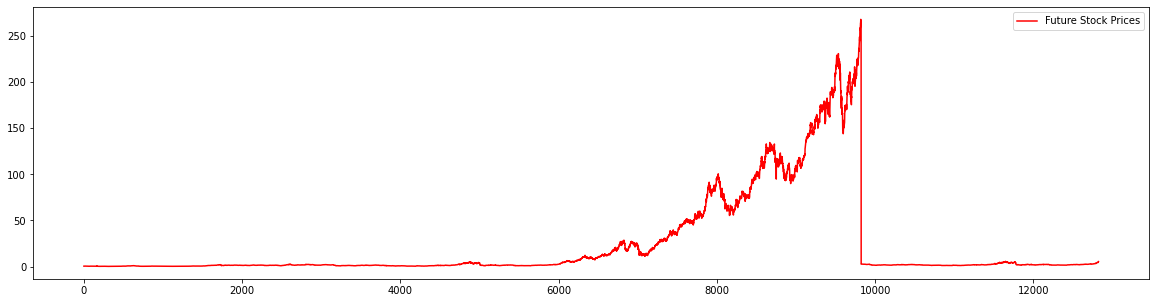

In [28]:
plt.figure(figsize=(20,5))
plt.plot(new,color="red",label="Future Stock Prices")
plt.legend()
plt.show()